# Applied Economic Analysis 1 : Final Assignment

|Name|SNR|ANR|
|----|---|----|
|Cagil Kazancioglu|2069865|u341064|
|Ayca Ozubek|2069862|u610820|

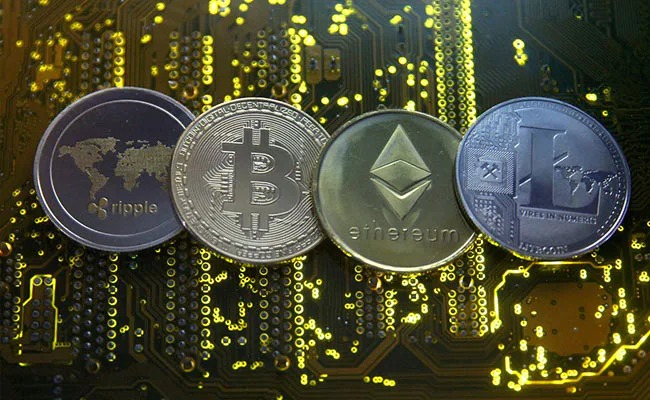

## Table of Contents

* [Questions](#Questions)
* [Introduction&Motivation](#Introduction&Motivation)
* [Data](#Data)
* [Answers](#Answers)
* [Assumptions](#Assumptions)
* [PythonCode](#PythonCode)
* [Conclusion&Discussion](#Conclusion&Discussion)


## Questions <a class="anchor" id="Questions"></a>

-  **Which cryptocurrencies had the most stable price movements within the taken timeline according to Sharpe Ratio and Max Drawdown analysis?**

- **How correlated these "stable" coins are with the BTC-USDT pair?**
    



- **Using the historical candlestick data we have, can trend reversals for the price of BTC-USDT pair be determined?**

## Introduction&Motivation <a class="anchor" id="Introduction&Motivation"></a>

In a rapidly globalizing and technologically developing world, the financial sector has also made great progress. Many new types of financial intermediaries have emerged. Cryptocurriencies are the most popular in this regard during the recent years. While many people are making big gains from the cryptocurrency market, there are also those who experience big financial losses. The clash of ideas surrounding the coins' use as financial instruments is a huge topic all by itself. There are common anxieties shared by global regulators, who view cryptocurrencies as volatile and speculative. 
We motivate our analysis on the needs of retail investors around the world who are looking for ways to divest their income. Cryptocurrencies provide an opportunity to those in countries where the inflation and currency are at the core of economic and financial troubles. Frustrated by rapidly eroding purchasing power, last year millions have flocked to cryptocurrencies amid soaring inflation. With this motivation in mind, we've tried to determine which coins can be the most "stable" income earners, and how are these coins correlated with the first and the most dominant, Bitcoin. Our analysis could be of help for those that might refrain the volatile nature of these markets but also those that are most in need of it.  
  
Our stability definition here exceeds those cryptocurrencies that are designed to minimize volatility by pegging to a more stable asset such as the U.S. dollar or gold. We take other coins that are designed to have various different blockchain usage. 

We've used [sharpe ratio](https://xena.exchange/blog/sharpe-ratio-in-crypto/) / [max drawdown](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp) to measure the pairs we've [taken](#taken) in our analysis in terms of their stability. 
The current literature designates Bitcoin as being the dominant cryptocurrency compared to all other such coins. For example [Yi et al.(2018)](https://www.sciencedirect.com/science/article/pii/S1057521918304095?casa_token=xeDhlTsbIGoAAAAA:gz7OikykqQQOpyVnkhccKPizm_OCoC6C1QxmiAmTISULHwL-X_GPFpX34aT0E_mWmd94CGZa) studies Bitcoin's importance as a net-emitter of connectedness in terms of volatility spillovers. Therefore in this research we've tried to look for correlations of our stable coins with Bitcoin. This approach would help us understand how this spillover effect translates, and how worried should alternative-coin investors be when following the Bitcoin price. 

We've also seen studies making price predictions using the approach we've taken when labeling optimal buy/sell points from historical candlestick data. There is an enormous scope for future research on this area and algorithms are being developed daily to beat the market with the highest probability. EMH states that you can't beat the market because it's perfectly efficient and people constantly need current information. EMH is not valid for cryptocurrency markets because the inefficiencies are evident with imperfect competition and asymmetric information. By making use of such inefficiencies, investors might just be able to beat the market on a risk adjusted basis.

## Data <a class="anchor" id="Data"></a>

We've initially started working with the complete data from [Kaggle](https://www.kaggle.com/jorijnsmit/binance-full-history) that includes an entire collection of 1 minute candlesticks of the top 1000 cryptocurrency pairs on Binance.com. Although the set only includes the data from past year, the entire collection was 25gigabytes of size at the of time of the acquisition.    

File format was .parquet which can easily be converted to .csv, however they were in this file format for a reason; in this case writing to an (uncompressed) csv file roughly increases the storage size by a factor 5. Some more info on Parquet's compression technique can be found in its [docs](https://parquet.apache.org/documentation/latest/). 
 
Later on in our analysis, only the USDT trading pairs of the coins we've [worked](#worked)  were needed, thus others were dropped with code and are not included in the dataset. Hence, the size of the dataset was lowered to 2.5gigabytes.

The data for cryptocurrency pairs differ from coin to coin, we've taken a common timeline for the analysis which was rather limited. The data for BTC for example starts from the 3rd quarter of 2017 and extends until the 3rd quarter of 2021. Some data for coins start from the end of 2020. 

## Answers<a class="anchor" id="Answers"></a>

* According to the results of our Sharpe ratio analysis, we've determined the 20 most stable cryptocurrency pairs and found that the [Axie infinity (AXS)](https://www.coinbase.com/price/axie-infinity) token is the most stable token in our given timeline. The resulting figure is [here](#here).  
* After normalizing the data we've used lagged cross correlation technique to determine correlation levels with the 20 most stable pairs with BTC-USD pair. As expected, our approach resulted in high correlation levels across all of the 20 most stable coins. The coin with the highest correlation level with BTC was observed to be [Polkadot(DOT)](https://coinmarketcap.com/nl/currencies/polkadot-new/). Results of this analysis can be seen in these [graphs](#graphs).

* We've tried to determine optimal buy/sell points using the historical 1-minute candlestick data with the [zig zag indicator](https://www.investopedia.com/terms/z/zig_zag_indicator.asp) method and we've labeled the optimal [points](#points). 



## Assumptions<a class="anchor" id="Assumptions"></a>

-  The Sharpe Ratio we've used has several weaknesses, including an assumption that investment returns are normally distributed. Assumption of normality is also important in modeling time-series.
- Our dataset is limited to a timeline that the market for cryptocurrencies, on average, had significant gains. This upward momentum, has recently completely shifted and subject to constant change.
- Somewhat obvious but the assumption was that the Bitcoin would be the dominant coin in our terms, and we've only looked for correlations there.

## PythonCode<a class="anchor" id="PythonCode"></a>

### Packages <a class="anchor" id="Packages"></a>

The following cell will install the required packages. We make sure the requirements.txt file is in the same directory with this notebook.

In [ ]:
!pip3 install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
pd.options.plotting.backend = 'plotly'
from scipy import stats
import datetime
from tqdm.auto import tqdm
import warnings
import vectorbt as vbt
warnings.filterwarnings('ignore')

First, we specify a list of pairs to analyze a subset of pairs.


In [ ]:
pairs_to_analyze = 'all' #'all' for analyzing all pairs. 

Read all pairs with 1 minute candles. We've set `data_path` variable accordingly to point to the root of all `.parquet` files. The dataset can be found at: https://www.kaggle.com/jorijnsmit/binance-full-history

In [ ]:
pwd

In [ ]:
resampling_interval = '1T' #Resampling and aggregation interval for candle size. Current is 1min candles (e.g. 15T for 15min)
data_path = 'C:\\Users\\hckaz\\Downloads\\data\\data' #Root path for parquet files. Please fill in your working directory given by the code in above cell.
pairs_list = glob(os.path.join(data_path,'*USDT.parquet')) #Get pairs with USDT (USD)
pairs_list = [os.path.basename(file_name).split('-')[0].lower() for file_name in pairs_list] #Get the first asset ticker name for each pair.

pairs_to_analyze = pairs_list if pairs_to_analyze == 'all' else pairs_to_analyze

<a id='worked'></a>
<a id='taken'></a>

In [ ]:
pairs_to_analyze

* Sanity check if the pair specified is valid.

In [ ]:
for pair in pairs_to_analyze:
    if pair not in pairs_list:
        raise ValueError(f"Unknown pair name {pair}. Check if the file exists.")

* Creating a dictionary consisting all USD pairs

The following part simply reads the files, resamples and aggregates accordingly and creates a dictionary of dataframes with their respective first asset ticker name key.

In [ ]:
ohlcv_dict = ohlc_dict = {                                                                                                             
    'open': 'first',                                                                                                    
    'high': 'max',                                                                                                       
    'low': 'min',                                                                                                        
    'close': 'last',                                                                                                    
    'volume': 'sum',                           
}

pair_df_dict = {pair_name: pd.read_parquet(os.path.join(data_path, pair_name.upper() + '-USDT.parquet')).resample(resampling_interval, closed='left', label='left').apply(ohlcv_dict).dropna()[ohlcv_dict.keys()] for pair_name in pairs_to_analyze}

We've limited our dictionary with the below code to show only the first 5 columns. HTML output shows the entire data.

In [ ]:
pair_df_dict

* Example: BTC-USD pair

In [ ]:
pair_df_dict['btc']

We have created a candlestick plot below to observe whether the data is meaningful or not. We wanted to observe how our data moves in a random timeline by choosing a random time interval. For this, we used the first two months of 2020.

In [ ]:
pair_df_dict['btc'].loc[pd.date_range(start='2020-01-01', end='2020-02-28')].vbt.ohlcv.plot(plot_type='Candlestick').show()


### Computing sharpe ratio and max drawdown values 

To find the most stable 20 pairs, we will encorporate a ratio called sharpe ratio. Sharpe ratio takes account the risk-free return and penalizes any high volatility (high variance). So, the higher returns will not result into the higher sharpe value, but assets providing stable income by buying and holding while maintaining the low risk and variance will get scored higher. 

We did not define individual functions for sharpe ratio and max drawdown calculations because the methods which used to calculate them were already implemented in the vectorbt library that we are using. We did not encorporate the total profit aspect of the below calculation because the question we wanted to answer was not which pairs brought the most returns, but which pairs brought the most stable returns.



In [ ]:
stats_dict = {}
for key, item in pair_df_dict.items():
    pf = vbt.Portfolio.from_holding(item.close, init_cash=100, freq=resampling_interval)

    stats_dict.update({
        key: {
            'sharpe':pf.sharpe_ratio(),
            'max_drawdown':pf.max_drawdown(),
            'total_profit':pf.total_profit()
        }
    })

stats_df = pd.DataFrame(stats_dict).transpose()
stats_df.total_profit = stats_df.total_profit / 100

By starting out with an initial cash amount of 100, we've sorted out best 20 pairs in our portfolio according to their sharpe ratio/max drawndown. Below we've graphed our top 20.

<a id='here'></a>

In [ ]:
stats_df = stats_df.sort_values('sharpe', ascending=False)
stats_df = stats_df[~stats_df.index.str.endswith('up')]
stats_df.iloc[:20].plot(y=['sharpe', 'max_drawdown'], kind='bar')

* Get valid date ranges for those 20 pairs

Some pairs are not complete or not up to date. Some of them has a long history. This cell finds a valid date range for all pairs. 

In [ ]:
pairs_close_df = pd.DataFrame({key: item.close for key, item in pair_df_dict.items() if key in stats_df.index[:20]}).dropna()
start_date, end_date = pairs_close_df.index[0], pairs_close_df.index[-1]

Histogram of BTC-USD pair.

The x values in this histogram are close prices, while the y-axis shows how many times these prices are counted. 

 

In [ ]:
btc_df = pair_df_dict['btc']
btc_df.close.hist()

Probability plot of BTC-USD pair in order to examine the distribution and it with the normal distribution. We've used [SciPy](https://scipy.org/) in order to have a better look.

In [ ]:
stats.probplot(btc_df.close, plot=plt, dist='norm');

QQ plot shows that the function is quite different from normal distribution, which makes it harder to do time series analysis. 

We've calculated percentages of changes in order to make them look like a normal distribution and generated data for lagged time series correlation analysis.

In [ ]:
# Calculating the percentage changes 

for key, item in pair_df_dict.items():
    item['pct_change'] = item.close.pct_change()
    item['change'] = item.close - item.close.shift(1)
    item['log_return'] = np.log(1 + item['pct_change'])
    pair_df_dict[key] = item.iloc[1:]
btc_df = pair_df_dict['btc'].loc[start_date:end_date]

In [ ]:
btc_df['pct_change'].loc[start_date:end_date].hist()

In [ ]:
# Probability plot after taking the percentage changes

stats.probplot(btc_df['pct_change'].loc[start_date:end_date], plot=plt, dist='norm');

It looks much better now as the distribution approached to a normal distribution. 

Now, let's define a [lagged cross correlation function](https://www.sciencedirect.com/science/article/pii/S0375960114012766#:~:text=Time%2Dlagged%20cross%2Dcorrelation%20usually,series%20shifted%20relatively%20in%20time.&text=A%20new%20method%2C%20detrended%20cross,nonstationary%20time%20series%20%5B8%5D.)

In [ ]:
# Defining a lagged cross correlation function.
def lagged_cross_cor(x, y, lag=0):
    return x.corr(y.shift(lag))

Now, let's compute cross correlation with all 20 pairs with BTC. 

We created a correlation matrix called corr_matrix. Each row of this matrix represents a coin. We show a specific row with the code corr_matrix[idx]. Each column of the matrix indicates the correlation with the time shifted coin data from 0 to 29. We assume that there is a high correlation between BTC and any of the coins, but what we want to find here is whether there is a correlation between the value of the BTC coin at time t and the value of any coin at t+20. So we wanted to find out how BTC's change at time t affects other coins when timeshifted.

In [ ]:
corr_matrix = np.zeros((20, 30))
for idx in range(20):
    corr_matrix[idx] = np.array([lagged_cross_cor(btc_df.loc[start_date:end_date, 'pct_change'].loc[start_date:end_date], pair_df_dict[stats_df.iloc[idx].name].loc[start_date:end_date, 'pct_change'], i) for i in range(30)])

Now, let's make a 3D bar plot to examine how those pairs correlate with BTC price, throughout the whole shift range. We've used the following package to get a good- looking plot.

<a id='graphs'></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
cols, rows = corr_matrix.shape

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(projection='3d')

xpos, ypos = np.arange(0, rows, 1), np.arange(0, cols, 1)
xpos, ypos = np.meshgrid(xpos + .25, ypos + .25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(rows*cols)
 
dx = 0.25*np.ones_like(zpos)
dy = dx.copy()
dz = corr_matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
plt.show()

Looks like they are heavily correlated (at zero lag) with BTC price. This is somewhat unsuprising as BTC's dominance in the market is well known.

Let's examine this correlation further in order to observe how shifted prices correlate with non-shifted BTC price.

In [ ]:
corr_df = pd.DataFrame(corr_matrix.T)
corr_df = corr_df.rename(columns={i:stats_df.iloc[i].name for i in range(20)})
corr_df['btc'] = np.array([lagged_cross_cor(btc_df.loc[start_date:end_date, 'pct_change'], btc_df.loc[start_date:end_date, 'pct_change'], i) for i in range(30)])
corr_df.iloc[1:].plot()

Some surprising pairs have high correlations with BTC, one can use the above interactive graph to carefully look for any certain pair's correlation. This may also mean that one can employ techniques upon the current BTC price to predict future price for other coins, as these will be a strong indicator of the movements in coins such as DOT (Polkadot) which has the strongest correlation at t+14. 

Moreover, even the future BTC price (like 14th timestep) seems to correlate the with the current BTC price. But this assumption is limited with the timeline of the data and provides no basis for analysis we could think of.

# Trend analysis

The [zig-zag indicator](https://www.investopedia.com/terms/z/zig_zag_indicator.asp) was employed to find best buy and sell points. With this way, we can observe the price trends without noise interference. The below code and the functions that made our analysis much easier were heavily influenced from https://github.com/jbn/ZigZag. 


In [ ]:
def peak_valley_pivots_from_close(close, up_thresh=.1, down_thresh=-.1):#, high, low, up_thresh, down_thresh):
    """
    Finds the peaks and valleys of a series of HLC (open is not necessary).
    TR: This is modified peak_valley_pivots function in order to find peaks and valleys for OHLC.
    Parameters
    ----------
    close : This is series with closes prices.
    high : This is series with highs  prices.
    low : This is series with lows prices.
    up_thresh : The minimum relative change necessary to define a peak.
    down_thesh : The minimum relative change necessary to define a valley.
    Returns
    -------
    an array with 0 indicating no pivot and -1 and 1 indicating valley and peak
    respectively
    Using Pandas
    ------------
    For the most part, close, high and low may be a pandas series. However, the index must
    either be [0,n) or a DateTimeIndex. Why? This function does X[t] to access
    each element where t is in [0,n).
    The First and Last Elements
    ---------------------------
    The first and last elements are guaranteed to be annotated as peak or
    valley even if the segments formed do not have the necessary relative
    changes. This is a tradeoff between technical correctness and the
    propensity to make mistakes in data analysis. The possible mistake is
    ignoring data outside the fully realized segments, which may bias analysis.
    """
    def _identify_initial_pivot(X, up_thresh, down_thresh):
        """Quickly identify the X[0] as a peak or valley."""
        PEAK, VALLEY = 1, -1

        x_0 = X[0]
        max_x = x_0
        max_t = 0
        min_x = x_0
        min_t = 0
        up_thresh += 1
        down_thresh += 1

        for t in range(1, len(X)):
            x_t = X[t]

            if x_t / min_x >= up_thresh:
                return VALLEY if min_t == 0 else PEAK

            if x_t / max_x <= down_thresh:
                return PEAK if max_t == 0 else VALLEY

            if x_t > max_x:
                max_x = x_t
                max_t = t

            if x_t < min_x:
                min_x = x_t
                min_t = t

        t_n = len(X)-1
        return VALLEY if x_0 < X[t_n] else PEAK
    
    if down_thresh > 0:
        raise ValueError('The down_thresh must be negative.')

    initial_pivot = _identify_initial_pivot(close, up_thresh, down_thresh)

    t_n = len(close)
    pivots = np.zeros(t_n, dtype='i1')
    pivots[0] = initial_pivot

    # Adding one to the relative change thresholds saves operations. Instead
    # of computing relative change at each point as x_j / x_i - 1, it is
    # computed as x_j / x_1. Then, this value is compared to the threshold + 1.
    # This saves (t_n - 1) subtractions.
    up_thresh += 1
    down_thresh += 1

    trend = -initial_pivot
    last_pivot_t = 0
    last_pivot_x = close[0]
    for t in tqdm(range(1, len(close)), "Creating labels"):

        if trend == -1:
            # x = low[t]
            x = close[t]
            r = x / last_pivot_x
            if r >= up_thresh:
                pivots[last_pivot_t] = trend
                trend = 1
                last_pivot_x = x
                last_pivot_t = t
            elif x < last_pivot_x:
                last_pivot_x = x
                last_pivot_t = t
        else:
            # x = high[t]
            x = close[t]
            r = x / last_pivot_x
            if r <= down_thresh:
                pivots[last_pivot_t] = trend
                trend = -1
                last_pivot_x = x
                last_pivot_t = t
            elif x > last_pivot_x:
                last_pivot_x = x
                last_pivot_t = t


    if last_pivot_t == t_n-1:
        pivots[last_pivot_t] = trend
    elif pivots[t_n-1] == 0:
        pivots[t_n-1] = trend

    pivots[pivots == 1] = 2
    pivots[pivots == -1] = 1

    return pivots

Now let's create buy, sell and hold labels with this strategy.

In [ ]:
btc_df['labels'] = peak_valley_pivots_from_close(btc_df.close, up_thresh=.1, down_thresh=-.1)

Here's how labelled data looks like.

In [ ]:
def show_labeled_data(df):
    fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
    df.plot(y="close", use_index=True, ax=ax, backend='matplotlib')
    plt.plot(df.close[df.labels == 1], color="g", marker="*", linestyle="None")
    plt.plot(df.close[df.labels == 2], color="r", marker="*", linestyle="None")
    plt.plot(df.close[df.labels > 0].index, df.close[df.labels > 0], '--', color='purple')
btc_df.loc[btc_df['labels'] == 0, 'labels'] = np.nan
btc_df['trend'] = btc_df['labels'].ffill()
btc_df.loc[btc_df['labels'].isna(), 'labels'] = 0
btc_df['trend'] = btc_df['trend'].astype(int)
btc_df['labels'] = btc_df['labels'].astype(int)

<a id='points'></a>

In [ ]:
show_labeled_data(btc_df)

Green points would've been the optimal buy points, with red points being the optimal sell points where a trader could make the maximum profit. The purple line between them indicates the seasonal price trend between two respective buy and sell points. Taking such an approach as basis for further analysis. One can make use of technical indicators (such as RSI) to predict future prices of assets. We've seen [techniques](https://www.sciencedirect.com/science/article/pii/S2405918818300928), that use random forest classifiers and decision tree analysis to control for the quality of such predictions. 

## Conclusion&Discussion<a class="anchor" id="Conclusion&Discussion"></a>

As a result of our study, we've determined the most stable 20 cryptocurrencies' USDT pairs. Using Sharpe Ratio and Max Drawdown method, we've identified these relatively safe coins, our approach can be extended to include for different timelines than our data. Moreover, we've identified and visualized the correlation with BTC-USDT pair of these stable coins. 
Finally, using the zig zag indicator method in the trend analysis part, we found the best buy/sell points of bitcoin over the historical data. The results we've found do not provide perfectly useful information for future predictions as these require more. In order to make future price predictions for the cryptocurrency market, we need to correctly analyze the risk adjustments and the factors that determine whether the market can be beaten at an effective rate.

[Efficient Market Hypothesis](https://www.cfainstitute.org/en/research/cfa-digest/2003/11/the-efficient-market-hypothesis-and-its-critics-digest-summary) states that you can't beat the market because it's perfectly efficient and people constantly need current information. [EMH](https://www.researchgate.net/profile/Muhammad-Azri-Mohd/publication/341536510_Testing_the_weak_form_of_efficient_market_in_cryptocurrency/links/5ec5db7292851c11a87ae7ea/Testing-the-weak-form-of-efficient-market-in-cryptocurrency.pdf) is not valid for cryptocurrency markets because the inefficiencies are evident with imperfect competition and asymmetric information. By making use of such inefficiencies, investors might just be able to beat the market on a risk adjusted basis. We've seen models using technical analysis indicators to predict future prices. Temporal future price predictions can be made using lagging indicators and random forest models. [Out of bag (OOB)](https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/#:~:text=The%20OOB_score%20is%20computed%20as,wrongly%20classifying%20the%20OOB%20Sample.) scoring is a way of validating the quality of such models. Further research can be made into this area using the approach and the data we have.

The information contained in or provided from or through this assignment is not intended to be and does not constitute financial advice.